# **Deep Audio Classifier Model using Convolutional Neural Networks**

**Algorithm description**:-

*   We are having a dataset of various audio clips containing Capuchin birds and Not Capuchin birds and some real life audio clips of forests.We need to train a model to detect the Capuchin audio perfectly from the forest audio files accurately.



   **The steps we follow are** :-



*   Convert audio data to waveforms
*    Transform waveform to spectrogram
*   Classify Capuchin bird calls





# Load Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np

# 2. Build Data Loading Function

## 2.1 Define Paths To Files ##

In [3]:
CAPUCHIN_FILE = os.path.join('data', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips','XC114131-0.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')


## 2.1 Build Dataloading Function ##

**Downsampling:-** Our initial dataset has a sampling frequency of 44100 Hz which is very high. So we need to downsample the audio for training. The audio is being downsampled to 16000Hz

In [4]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

**Plotting the waves**:-

We can observe that the blue graph is the Capuchin wave and the orange wave is the Not Capuchin wave.

So we can distinguish them clearly.

In [5]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

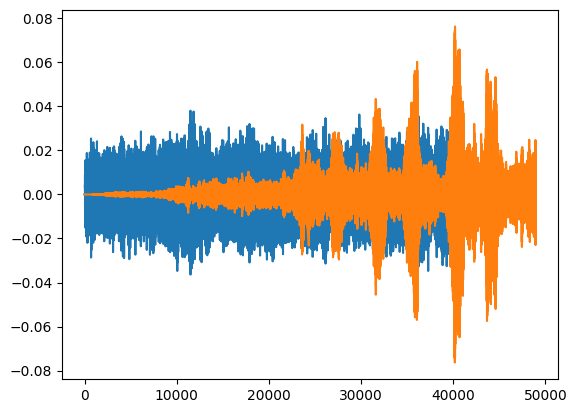

In [6]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# Create Tensorflow Dataset

We now convert the waveforms into tensors to apply the Tensorflow library,

waves of Capuchin as "**pos**" and Non Capuchin as '**neg**'

## 3.1 Define paths to positive and negative data

In [7]:
POS = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips')
NEG = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips')

In [8]:
import os

pos_files = os.listdir(POS)
neg_files = os.listdir(NEG)

print("Positive files:", pos_files)
print("Negative files:", neg_files)


Positive files: ['XC27882-2.wav', 'XC227469-2.wav', 'XC456236-3.wav', 'XC227471-6.wav', 'XC227468-3.wav', 'XC513083-1.wav', 'XC216012-12.wav', 'XC9892-0.wav', 'XC27882-0.wav', 'XC227469-3.wav', 'XC433953-10.wav', 'XC79965-10.wav', 'XC526106-4.wav', 'XC46241-4.wav', 'XC600460-0.wav', 'XC201990-4.wav', 'XC388470-5.wav', 'XC114132-4.wav', 'XC227471-3.wav', 'XC9221-0.wav', 'XC433953-8.wav', 'XC46241-1.wav', 'XC178168-4.wav', 'XC216012-19.wav', 'XC395129-4.wav', 'XC227468-2.wav', 'XC46241-2.wav', 'XC216012-3.wav', 'XC216010-7.wav', 'XC216012-8.wav', 'XC65196-2.wav', 'XC3776-4.wav', 'XC3776-2.wav', 'XC526106-0.wav', 'XC456236-0.wav', 'XC3776-3.wav', 'XC114132-5.wav', 'XC27882-5.wav', 'XC178168-2.wav', 'XC79965-2.wav', 'XC307385-0.wav', 'XC600460-1.wav', 'XC9221-1.wav', 'XC433953-9.wav', 'XC16804-0.wav', 'XC178167-1.wav', 'XC388470-6.wav', 'XC456236-1.wav', 'XC22397-1.wav', 'XC216012-0.wav', 'XC216010-1.wav', 'XC227468-5.wav', 'XC216012-4.wav', 'XC433953-2.wav', 'XC16804-1.wav', 'XC114131-3.w

## 3.2 Create Tensorflow Datasets

In [9]:
pos = tf.data.Dataset.list_files(POS + '/*-*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*-*.wav')


## 3.2 Add labels and combine positive and negative samples

In [10]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [11]:
data = positives.concatenate(negatives)

# 4. Determine Average Length of a capucin call

## 4.1 calculate wave cycle length

In [12]:
lengths = []
for file in os.listdir(os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips')):
    file_path = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips', file)
#     print("Current file path:", file_path)
    tensor_wave = load_wav_16k_mono(file_path)
    lengths.append(len(tensor_wave))


## 4.2 calculate mean, min  and max

In [13]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [14]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [15]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# Build Preprocessing Function

## 5.1 Build Preprocessing Function

*   The loaded waveform is then trimmed or padded to a length of 48000 samples (which corresponds to 3 seconds of audio assuming a sample rate of 16 kHz).
*   If the waveform is shorter than 48000 samples, it pads the waveform with zeros at the beginning to make it 48000 samples long. This is done using TensorFlow's tf.zeros() function.

*   The function then computes the Short-Time Fourier Transform (STFT) of the audio waveform using TensorFlow's tf.signal.stft() function.


In [16]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test out the function and viz spectrogram

Now the wave is converted into a spectrogram which is in the format of an image and can be plotted as below. We can observe the difference between the spectrograms of the Capuchin and non-Capuchin spectrograms.

Now we can apply a CNN on these spectrograms

In [17]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [18]:
spectrogram, label = preprocess(filepath, label)

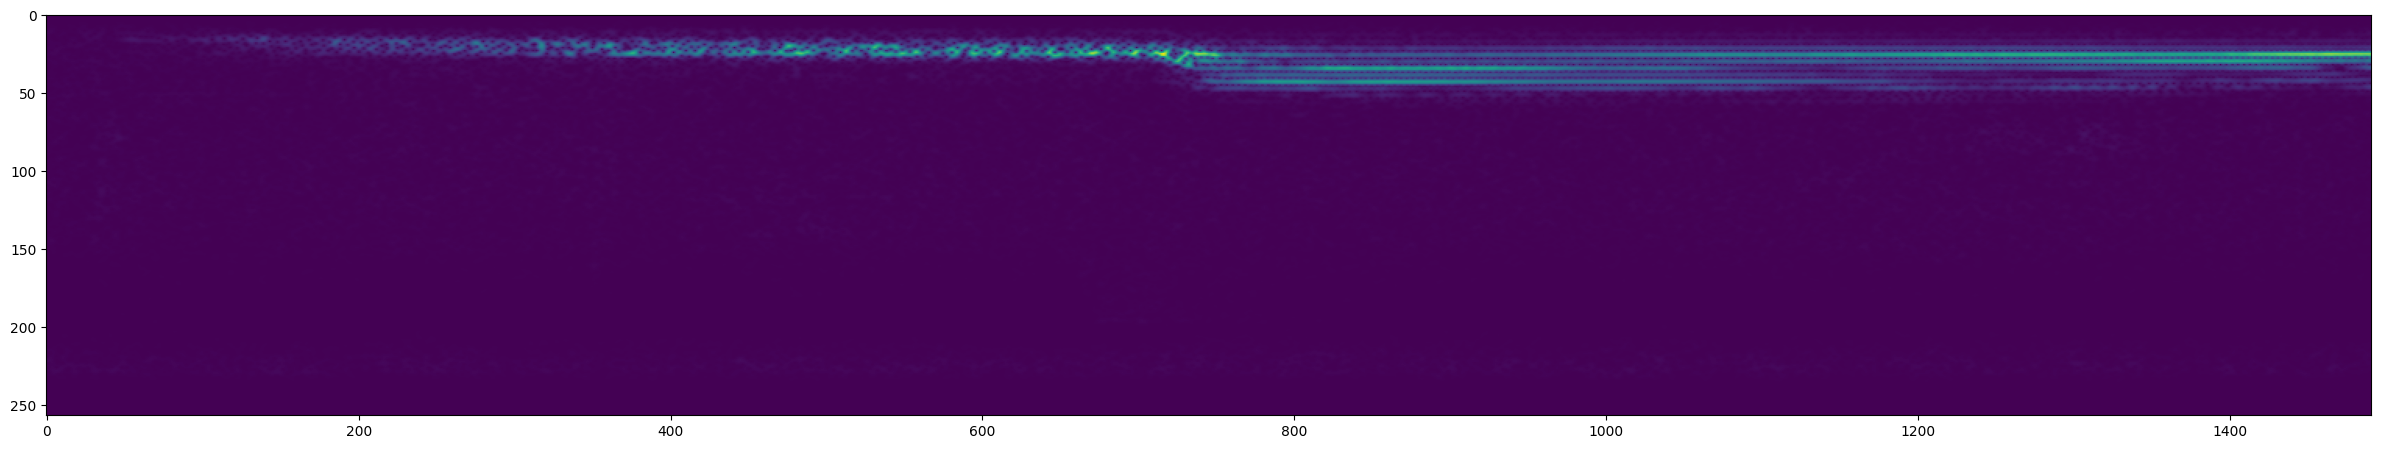

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# Creating Training and Testing Partitions

This pipeline mechanism sets up a data pipeline for training a machine learning model on audio data. It preprocesses the data, caches it for efficiency, shuffles it for randomness, batches it for training, and prefetches batches to optimize performance.

## 6.1 create a tensorflow data pipeline

In [20]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size = 10000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions ##

Now we are splitting our data as 70% for training and 30% for testing the model i.e 36 batches for training and the remaining batches for testing

In [21]:
train = data.take(36)
test = data.skip(36).take(15)


## 6.3 Test One Batch

In [22]:
samples, labels = train.as_numpy_iterator().next()

In [23]:
samples.shape

(16, 1491, 257, 1)

# Build Deep Learning Model

**CNN Architecture:-**

We used **Two** **(2)** convolutional layers, each followed by a max-pooling layer because if we use further more convolutional layers there may be a chance of overfitting as already our accuracy is almost 100% now.

Convolutional layers with **3x3** filters are suitable choices in CNN architectures for basic image processing, as they capture local spatial patterns effectively.


The number of filters **(16)** chosen for each convolutional layer are relatively small, because we are just using for a normal task of filtering with minimum computation

**Max-pooling layers** help in reducing the spatial dimensions of the feature maps, leading to translation invariance and reducing the computational burden.

**Two dense layers** are used, one with **128 units** and another with 1 unit.
The dense layers are responsible for learning high-level features from the flattened representation obtained from the convolutional layers.

**ReLU activation** is used in the **hidden dense layer** (128 units), which helps introduce non-linearity and capture complex patterns in the data.

**Sigmoid activation** is used in the **output layer (1 unit)** for binary classification tasks


## 7.1 Load Tensorflow Dependencies

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.utils import plot_model

## 7.2 Build Sequential Model, Compile and View Summary

In [25]:
# Define your CNN model
model = Sequential()

# First Convolutional Layer with MaxPooling
model.add(Conv2D(16,(3,3),activation='relu', input_shape=(1491,257,1)))
model.add(MaxPooling2D((2,2)))

# Second Convolutional Layer with MaxPooling
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 744, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 371, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 368032)            0         
                                                                 
 dense (Dense)               (None, 128)               4

## Fit Model, View Loss and KPl Plots

In [28]:
history = model.fit(train, epochs=5, validation_data=test)

Epoch 1/5
36/36 [==============================] - 7s 65ms/step - loss: 0.5960 - accuracy: 0.9115 - recall: 0.8590 - precision: 0.8221 - val_loss: 0.0583 - val_accuracy: 0.9786 - val_recall: 0.9667 - val_precision: 0.9508
Epoch 2/5
36/36 [==============================] - 2s 52ms/step - loss: 0.0298 - accuracy: 0.9913 - recall: 0.9808 - precision: 0.9871 - val_loss: 0.0058 - val_accuracy: 0.9957 - val_recall: 0.9848 - val_precision: 1.0000
Epoch 3/5
36/36 [==============================] - 2s 56ms/step - loss: 0.0268 - accuracy: 0.9931 - recall: 0.9872 - precision: 0.9872 - val_loss: 0.0066 - val_accuracy: 1.0000 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/5
36/36 [==============================] - 2s 50ms/step - loss: 0.0177 - accuracy: 0.9931 - recall: 0.9878 - precision: 0.9878 - val_loss: 0.0614 - val_accuracy: 0.9872 - val_recall: 0.9545 - val_precision: 1.0000
Epoch 5/5
36/36 [==============================] - 2s 52ms/step - loss: 0.0206 - accuracy: 0.9948 - recall: 0.98

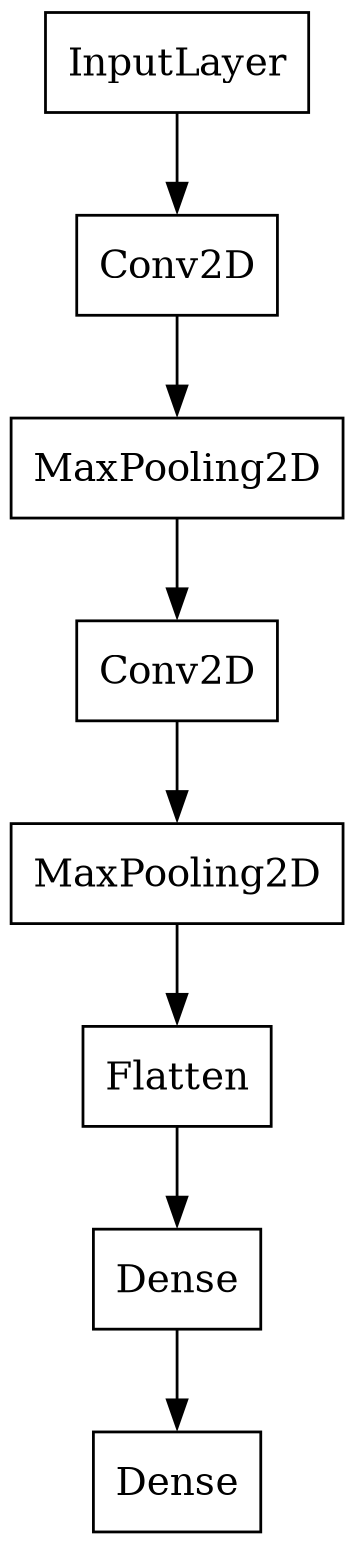

In [29]:
plot_model(
    model,
    #show_shapes=False,
    #show_dtype=False,
    show_layer_names=False,
    #rankdir='TB',
    #expand_nested=False,
    dpi=200,
    #show_layer_activations=False,
    #show_trainable=False
)

In [30]:
test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)

15/15 [==============================] - 0s 18ms/step - loss: 0.0140 - accuracy: 0.9957 - recall: 0.9839 - precision: 1.0000
Test accuracy: [0.013976868242025375, 0.995726466178894, 0.9838709831237793, 1.0]


In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])


In [32]:
model.save('model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


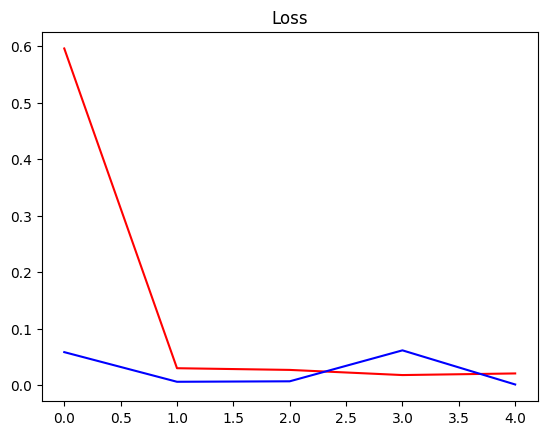

In [33]:
plt.title('Loss')
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.show()

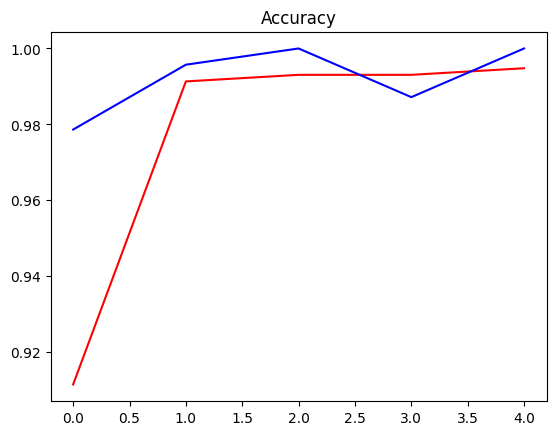

In [34]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.show()

In [35]:
# plt.title('Recall')
# plt.plot(history.history['recall'], 'r')
# plt.plot(history.history['val_recall'], 'b')
# plt.show()

In [36]:
# plt.title('Precision')
# plt.plot(history.history['precision'], 'r')
# plt.plot(history.history['val_precision'], 'b')
# plt.show()

In [37]:
smp,lbl=test.as_numpy_iterator().next()

for item,label in test.as_numpy_iterator():
    smp=np.vstack((smp,item))
    lbl=np.hstack((lbl,label))

8/8 [==============================] - 1s 74ms/step


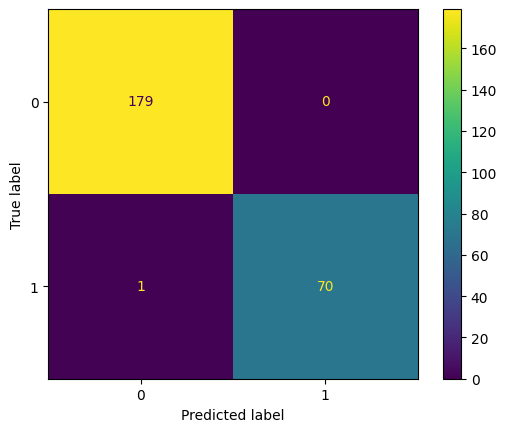

In [38]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay ,classification_report
ypred=model.predict(smp)
ypred=[1 if pred>=0.95 else 0 for pred in ypred]
conf=confusion_matrix(lbl,ypred)
dp=ConfusionMatrixDisplay(conf,display_labels=[0,1])
dp.plot()
plt.show()


In [39]:
print(classification_report(lbl,ypred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       179
         1.0       1.00      0.99      0.99        71

    accuracy                           1.00       250
   macro avg       1.00      0.99      1.00       250
weighted avg       1.00      1.00      1.00       250



# Make Prediction on single clip

## 8.1 get one batch and make prediction

In [40]:
xtest,ytest = test.as_numpy_iterator().next()

In [41]:
yhat = model.predict(xtest)

1/1 [==============================] - 0s 33ms/step


In [42]:
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]
yhat

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

# Build Forest Parsing Function

## 9.1 load up mp3s

In [43]:
def load_mp3_16k_mono(filename):
    """ Load an MP3 file, convert it to a float tensor, and resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    
    # Resample to 16 KHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    
    return wav


In [44]:
mp3 = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings/recording_00.mp3')

In [45]:
wav = load_mp3_16k_mono(mp3)

In [46]:
audio_slice = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [47]:
sample, index = audio_slice.as_numpy_iterator().next()

## 9.2 Build Function to convert clips into windowed spectrogram

In [48]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

# 9.3 convert longer clips into windows and make predictions

In [49]:
audio_slice = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slice = audio_slice.map(preprocess_mp3)
audio_slice = audio_slice.batch(64)

In [50]:
yhat = model.predict(audio_slice)
yhat  = [ 1 if prediction > 0.95 else 0 for prediction in yhat]
print(yhat)

3/3 [==============================] - 3s 421ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 9.4 Group Consenutive Detectons

In [51]:
from itertools import groupby
yhat = [ key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [52]:
calls

5

# 10 Make Prediction

## 10.1 Loop over all recordings and make prediction

In [53]:
results = {}
for file in os.listdir(os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings')):
    FILEPATH = os.path.join('data','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings',file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    yhat = model.predict(audio_slices)
    results[file] = yhat

1/1 [==============================] - 1s 597ms/step


## Convert predictions into classes

In [54]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.95 else 0 for prediction in logits]
# class_preds

## 10.3 Group Consective Detections

In [55]:
postprocessd = {}
for file, scores in class_preds.items():
    postprocessd[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessd

{'recording_76.mp3': 10,
 'recording_62.mp3': 1,
 'recording_48.mp3': 13,
 'recording_44.mp3': 1,
 'recording_45.mp3': 3,
 'recording_06.mp3': 11,
 'recording_43.mp3': 5,
 'recording_68.mp3': 1,
 'recording_95.mp3': 5,
 'recording_17.mp3': 16,
 'recording_65.mp3': 5,
 'recording_74.mp3': 4,
 'recording_10.mp3': 5,
 'recording_49.mp3': 0,
 'recording_15.mp3': 2,
 'recording_37.mp3': 4,
 'recording_64.mp3': 3,
 'recording_39.mp3': 4,
 'recording_04.mp3': 10,
 'recording_28.mp3': 16,
 'recording_05.mp3': 0,
 'recording_80.mp3': 1,
 'recording_57.mp3': 4,
 'recording_12.mp3': 8,
 'recording_59.mp3': 6,
 'recording_67.mp3': 0,
 'recording_09.mp3': 0,
 'recording_79.mp3': 0,
 'recording_14.mp3': 0,
 'recording_63.mp3': 11,
 'recording_86.mp3': 7,
 'recording_47.mp3': 9,
 'recording_03.mp3': 0,
 'recording_33.mp3': 0,
 'recording_08.mp3': 9,
 'recording_51.mp3': 2,
 'recording_35.mp3': 0,
 'recording_81.mp3': 5,
 'recording_30.mp3': 3,
 'recording_88.mp3': 0,
 'recording_75.mp3': 1,
 'recordi